In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#### Read Data

In [17]:
data = pd.read_csv('D:\FirstSemMT\ML\Assignments\cancer.csv')
data.drop(['id','diagnosis','Unnamed: 32'], axis = 1, inplace = True) 
data = data.values
samples,features = data.shape
print(samples,features)

569 30


#### Cost function  

In [18]:
def calculate_cost(m1,m2):
    cost = 0
    cluster_label = np.zeros(samples)
    for i in range(samples):
        d1 = np.linalg.norm(data[i] - m1,axis=0,ord=1)
        d2 = np.linalg.norm(data[i] - m2,axis=0,ord=1)
        if(d1<=d2):
            cluster_label[i]=1
            cost += d1
        else:
            cluster_label[i]=2
            cost += d2
    return cluster_label,cost

#### Initialize medoids randomly from data.  

In [19]:
k=2
np.random.seed(1000)
r1 = np.random.randint(samples, size=1)
r2 = np.random.randint(samples, size=1)
med1 = data[r1[0],:]
med2 = data[r2[0],:]
print(r1,r2)

[435] [71]


#### Associate each data point to the closest medoid and computing cost of it.

In [20]:
cluster_label,cost = calculate_cost(med1,med2)

#### Compute the cost of non medoid data points by replacing it with respective medoids. If cost of it is lesser than earlier then assign that data point as medoid. Repeat until best cost found.

In [21]:
while(1):
    print(cost)
    current_min_cost = math.inf
    idx = -1
    repl = -1
    for i in range(samples):
        if(cluster_label[i]==1):
            _, current_cost = calculate_cost(data[i,:],med2)
            if(current_cost<current_min_cost):
                current_min_cost = current_cost
                idx=i
                repl=1

    for i in range(samples):
        if(cluster_label[i]==2):
            _, current_cost = calculate_cost(med1,data[i,:])
            if(current_cost<current_min_cost):
                current_min_cost = current_cost
                idx=i
                repl=2

    if(current_min_cost<cost):
        if(repl==1):
            med1=data[idx,:]
            cluster_label, cost = calculate_cost(med1,med2)
        elif(repl==2):
            med2=data[idx,:]
            cluster_label, cost = calculate_cost(med1,med2)
    else:
        break

353088.49592939985
308786.0037724005
240256.21020440003
231900.80712539988


#### Number of points in clusters 

In [22]:
cluster1_data = np.where(cluster_label==1)[0].shape[0]
print('Number of points in cluster 1 :' ,cluster1_data)
cluster2_data = np.where(cluster_label==2)[0].shape[0]
print('Number of points in cluster 2 :' ,cluster2_data)

Number of points in cluster 1 : 140
Number of points in cluster 2 : 429


#### Plotting function 

In [ ]:
# def plot_cluster(cluster_label,m1,m2):
#     fig = plt.gcf()
#     plt.scatter(m1[0],m1[1],color='r',s=50,label='Centroid 1')
#     plt.scatter(m2[0],m2[1],color='black',s=50,label='Centroid 2')
#     plt.scatter(data[np.where(cluster_label==1)[0],0],data[np.where(cluster_label==1)[0],1],label='Cluster 1')
#     plt.scatter(data[np.where(cluster_label==2)[0],0],data[np.where(cluster_label==2)[0],1],label='Cluster 2')
#     fig.set_size_inches(18.5, 10.5)
#     plt.legend()
#     plt.show()

#### Scatter plot

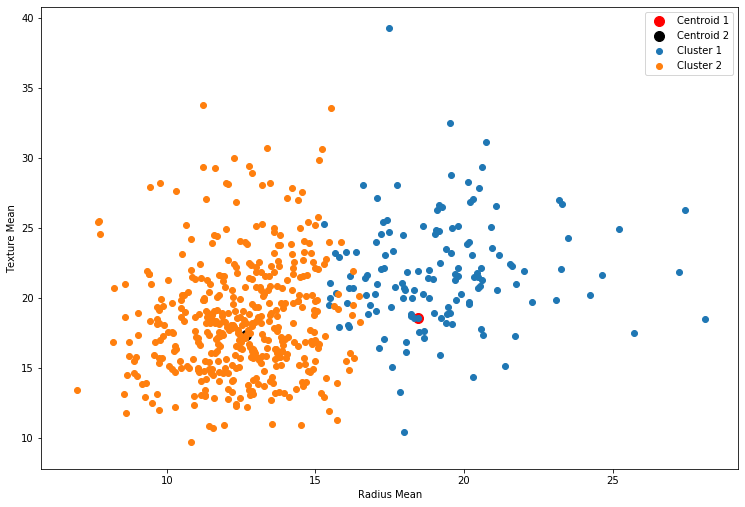

In [23]:
fig = plt.gcf()
plt.scatter(med1[0],med1[1],color='r',s=100,label='Centroid 1')
plt.scatter(med2[0],med2[1],color='black',s=100,label='Centroid 2')
plt.scatter(data[np.where(cluster_label==1)[0],0],data[np.where(cluster_label==1)[0],1],label='Cluster 1')
plt.scatter(data[np.where(cluster_label==2)[0],0],data[np.where(cluster_label==2)[0],1],label='Cluster 2')
fig.set_size_inches(12.5, 8.5)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()